### Report Q10

The code the question can be found in Q10.py file. We will import the functions defined in the file to demonstrate usbaility and give results for different questions.


The function bilateral_filtering can be used as follows:

In [1]:
# Import functions to use in the code.

# Functions to read the image and convert to 8bit representation.
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import time

# Maplotlib to plot the images.
import matplotlib.pyplot as plt
%matplotlib inline

# Main functions for finding and showing dominant colors
from Q10 import bilateral_filtering, high_boost_filtering

### Bilateral Filtering

Text(0.5,1,'Filtered image')

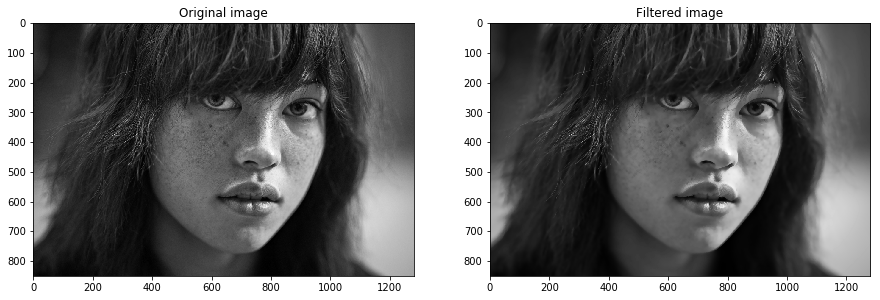

In [4]:
img = imread('A2_resources/face.jpg', as_gray=True)
new_img = bilateral_filtering(img, sigma_d=16)

f, ax = plt.subplots(1, 2, figsize=(15,15))

ax[0].imshow(img, 'gray')
ax[0].set_title("Original image")

ax[1].imshow(new_img, 'gray')
ax[1].set_title("Filtered image")

Text(0.5,1,'Filtered image')

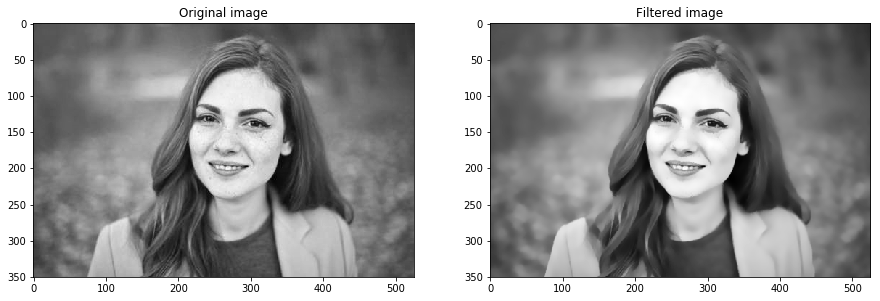

In [3]:
img = imread('A2_resources/face2.jpg', as_gray=True)
new_img = bilateral_filtering(img, sigma_d=16)

f, ax = plt.subplots(1, 2, figsize=(15,15))

ax[0].imshow(img, 'gray')
ax[0].set_title("Original image")

ax[1].imshow(new_img, 'gray')
ax[1].set_title("Filtered image")

### Difference at intensity discontinuity

Text(0.5,1,'High boost filtered image')

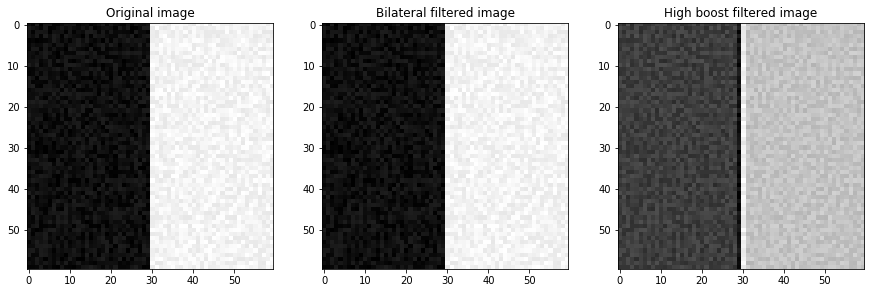

In [5]:
dark = np.random.randint(0, 30, (60, 30))
light = np.random.randint(230, 255, (60, 30))

img = np.hstack((dark, light))

bilat = bilateral_filtering(img, size=3)
hboost = high_boost_filtering(img, size=3)

f, ax = plt.subplots(1, 3, figsize=(15,15))

ax[0].imshow(img, 'gray')
ax[0].set_title("Original image")

ax[1].imshow(bilat, 'gray')
ax[1].set_title("Bilateral filtered image")

ax[2].imshow(hboost, 'gray')
ax[2].set_title("High boost filtered image")

Bilateral filters preserve both sharp and smooth intensity changes. High boost filters preserve sharp changes but there is a loss of information in smooth regions.

### High Boost vs Bilateral

Text(0.5,1,'High boost filtered image')

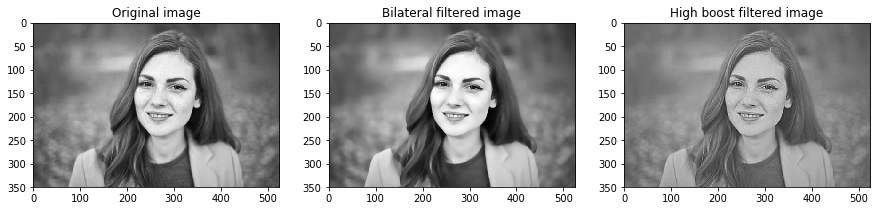

In [6]:
img = imread('A2_resources/face2.jpg', as_gray=True)

bilat = bilateral_filtering(img)
hboost = high_boost_filtering(img)

f, ax = plt.subplots(1, 3, figsize=(15,15))

ax[0].imshow(img, 'gray')
ax[0].set_title("Original image")

ax[1].imshow(bilat, 'gray')
ax[1].set_title("Bilateral filtered image")

ax[2].imshow(hboost, 'gray')
ax[2].set_title("High boost filtered image")

### Effect of Domain and Range values:

In [7]:
domains = [4, 8, 16]
ranges = [0.05, 0.2, 0.8]

outputs = [bilateral_filtering(img, sigma_d=d, sigma_r=r) for r in ranges for d in domains]



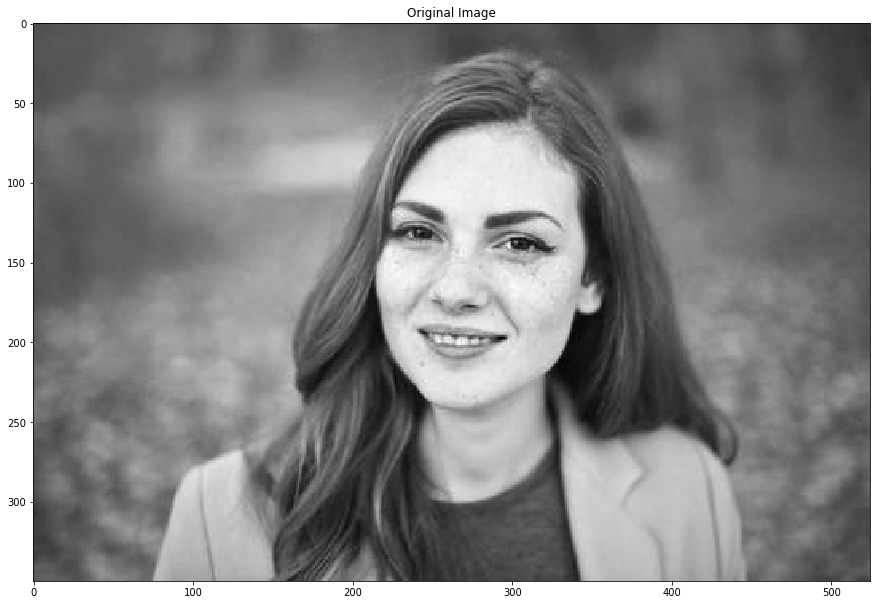

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


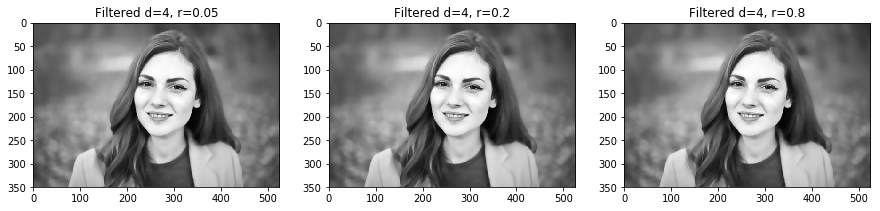

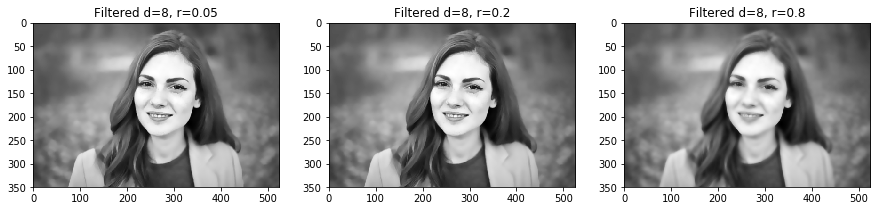

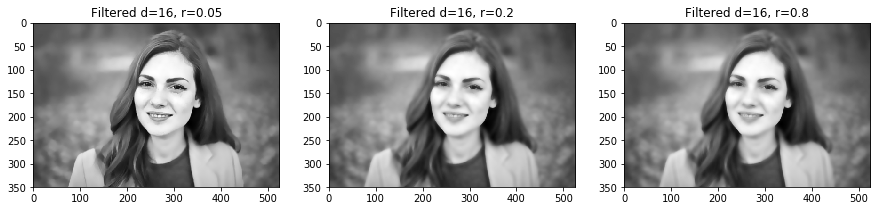

In [11]:
fig = plt.figure(figsize=(15, 15))
plt.imshow(img, "gray")
plt.title("Original Image")
plt.show()

for i, d in enumerate(domains):
    f, ax = plt.subplots(1, 3, figsize=(15,15))
    for j, r in enumerate(ranges):
        ax[j].imshow(outputs[i+j], 'gray')
        ax[j].set_title("Filtered d={}, r={}".format(d, r))
    f.show()

### Observations

- The blurring of the images increases as the range parameter is increased. 
- Larger features are made smooth when the domain parameter is increase